In [12]:
import pandas as pd

df = pd.read_csv("microsoft_stock_prices_2016_2026_refined.csv")
df.head()

,Date,Close,High,Low,Open,Volume
0,2016-02-03,45.671837,46.748837,44.883786,46.626252,57559800
1,2016-02-04,45.531754,46.240999,44.980118,45.619313,46987100
2,2016-02-05,43.920628,45.531751,43.395263,45.479213,62009000
3,2016-02-08,43.263927,43.404025,42.195681,43.386512,59290500
4,2016-02-09,43.150074,43.990662,42.615951,42.922417,46740500


You can upload files to Colab using the following methods:

1.  **Using `files.upload()` (for small to medium-sized files):** This method opens a file picker dialog in your browser, allowing you to select and upload files directly to the Colab runtime. These files are temporary and will be deleted when the runtime is recycled.
2.  **Mounting Google Drive (for larger files or persistent storage):** You can mount your Google Drive to your Colab notebook, giving you access to all your files stored in Drive. This is ideal for larger datasets or if you want your files to persist across sessions.
3.  **Using `wget` or `curl` (for files hosted online):** If your file is available via a URL, you can download it directly into the Colab environment using these command-line utilities.
4.  **Uploading directly via the file browser (left sidebar):** You can also drag and drop files directly into the file browser pane in the left sidebar of the Colab interface.

Here's an example of how to use `files.upload()`:

In [13]:
from google.colab import files

# This will open a file selection dialog
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


Saving microsoft_stock_prices_2016_2026_refined.csv to microsoft_stock_prices_2016_2026_refined (1).csv
User uploaded file "microsoft_stock_prices_2016_2026_refined (1).csv" with length 235477 bytes


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv("microsoft_stock_prices_2016_2026_refined.csv")

df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

df.head()



,Date,Close,High,Low,Open,Volume
0,2016-02-03,45.671837,46.748837,44.883786,46.626252,57559800
1,2016-02-04,45.531754,46.240999,44.980118,45.619313,46987100
2,2016-02-05,43.920628,45.531751,43.395263,45.479213,62009000
3,2016-02-08,43.263927,43.404025,42.195681,43.386512,59290500
4,2016-02-09,43.150074,43.990662,42.615951,42.922417,46740500


In [15]:
date_input = input("Enter Date (YYYY-MM-DD): ")

result = df[df['Date'] == date_input]

if result.empty:
    print("No data found.")
else:
    open_price = result['Open'].values[0]
    close_price = result['Close'].values[0]
    volume = result['Volume'].values[0]

    change_percent = ((close_price - open_price) / open_price) * 100

    print("\n📊 Stock Data")
    print("----------------")
    print("Open:", open_price)
    print("Close:", close_price)
    print("Change %:", round(change_percent,2))
    print("Volume:", volume)


Enter Date (YYYY-MM-DD): 2020-01-22

📊 Stock Data
----------------
Open: 158.94318658850688
Close: 157.32907104492188
Change %: -1.02
Volume: 24138800


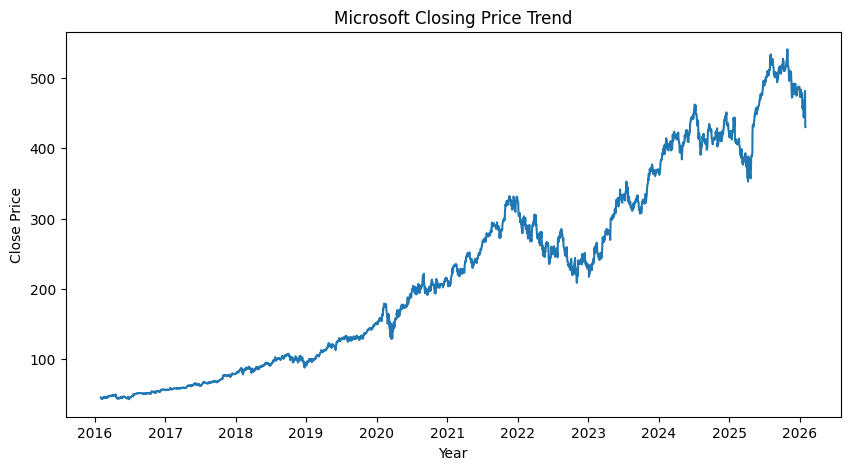

In [16]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'])
plt.title("Microsoft Closing Price Trend")
plt.xlabel("Year")
plt.ylabel("Close Price")
plt.show()


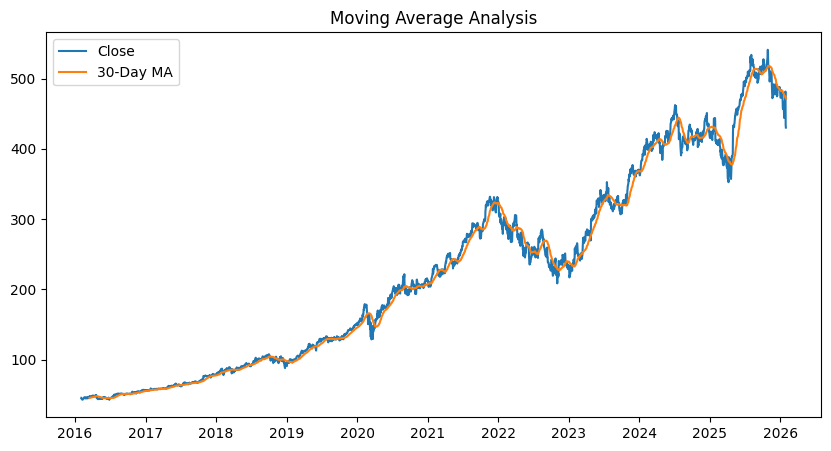

In [17]:
df['MA30'] = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label='Close')
plt.plot(df['Date'], df['MA30'], label='30-Day MA')
plt.legend()
plt.title("Moving Average Analysis")
plt.show()


In [18]:
df['Prediction'] = df['Close'].shift(-1)

df = df.dropna()

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Prediction']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

print("Model Accuracy:", model.score(X_test, y_test))


Model Accuracy: 0.9990740070903164


In [19]:
latest_data = df[['Open','High','Low','Volume']].iloc[-1]

prediction = model.predict([latest_data])

print("Predicted Next Close Price:", prediction[0])


Predicted Next Close Price: 427.3495640603772


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
